<a href="https://colab.research.google.com/github/fajrulsantoso/Pcvk_2025-2026/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

D. TUGAS PRAKTIKUM

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Global Threshold Manual

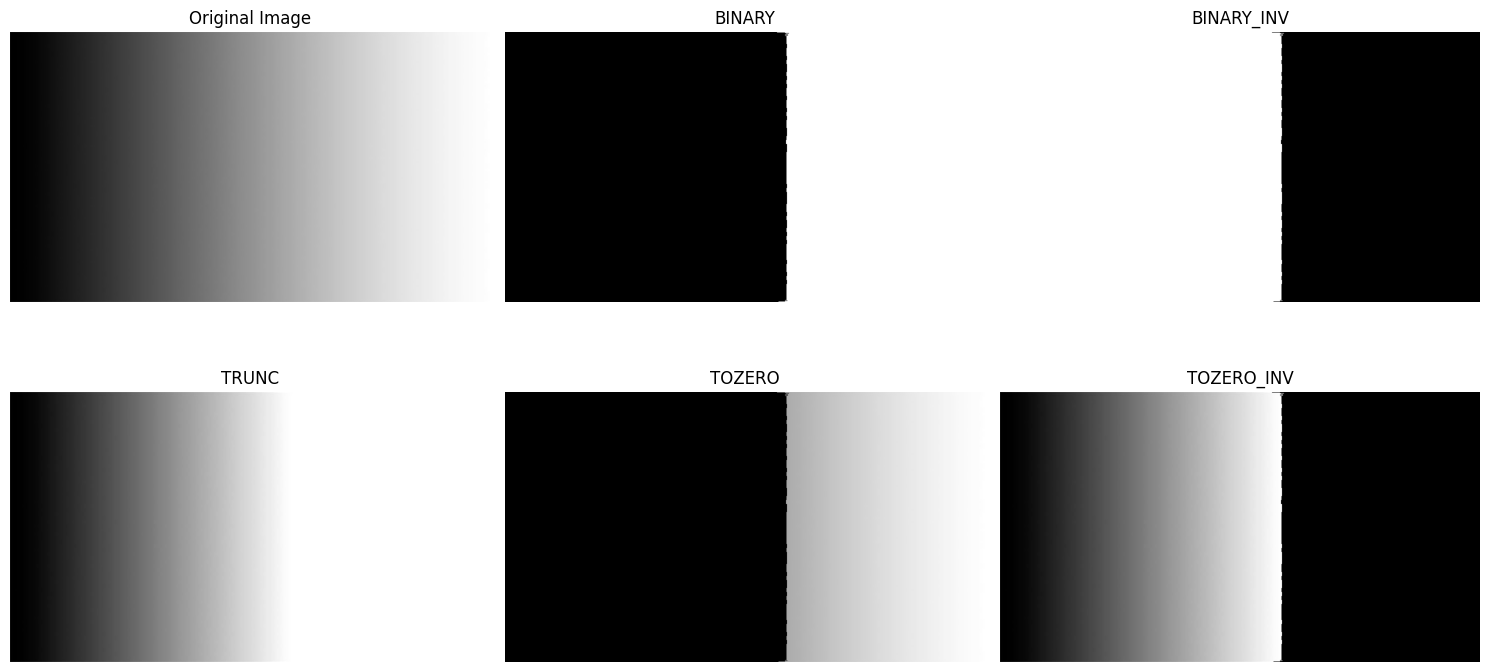

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# =============================
# Membaca Gambar
# =============================

filename = '/content/drive/MyDrive/Pcvk/gradient.jpg'  # Path file gambar
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)       # Baca dalam mode grayscale

if img is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan pada path: {filename}")

# =============================
# Nilai Ambang (Threshold)
# =============================

thresh_value = 170
max_val = 255

# =============================
# Operasi Thresholding Manual
# =============================

# 1. BINARY
binary = np.zeros_like(img)
binary[img > thresh_value] = max_val

# 2. BINARY_INV
binary_inv = np.zeros_like(img)
binary_inv[img <= thresh_value] = max_val

# 3. TRUNC
trunc = img.copy()
trunc[img > thresh_value] = thresh_value

# 4. TOZERO
tozero = img.copy()
tozero[img <= thresh_value] = 0

# 5. TOZERO_INV
tozero_inv = img.copy()
tozero_inv[img > thresh_value] = 0

# =============================
# Menampilkan Hasil
# =============================

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize=(15, 8))
for i, (title, image) in enumerate(zip(titles, images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Otsu Thresholding Manual

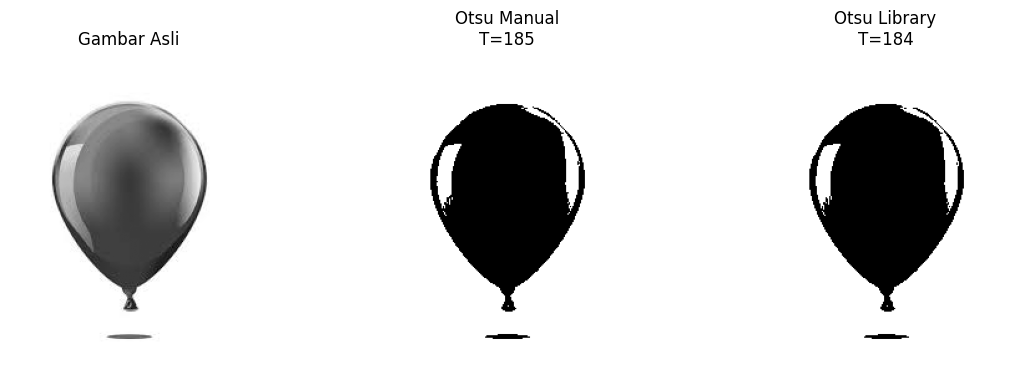

Threshold Otsu Manual  : 185
Threshold Otsu Library : 184


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ===== Fungsi Otsu Thresholding Manual =====
def otsu_threshold_manual(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]).ravel()
    hist_norm = hist / hist.sum()

    best_t, best_var = 0, 0
    for t in range(1, 255):
        w0, w1 = np.sum(hist_norm[:t]), np.sum(hist_norm[t:])
        if w0 == 0 or w1 == 0:
            continue
        m0 = np.sum(np.arange(t) * hist_norm[:t]) / w0
        m1 = np.sum(np.arange(t, 256) * hist_norm[t:]) / w1
        var_between = w0 * w1 * (m0 - m1) ** 2
        if var_between > best_var:
            best_var, best_t = var_between, t
    return best_t

# ===== Baca Gambar =====
filename = '/content/drive/MyDrive/Pcvk/balloon.jpg'  # Path gambar
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("❌ Gambar tidak ditemukan di path:", filename)
else:
    # Otsu manual & library
    t_manual = otsu_threshold_manual(img)
    _, img_manual = cv2.threshold(img, t_manual, 255, cv2.THRESH_BINARY)
    t_lib, img_lib = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # ===== Tampilkan =====
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1); plt.imshow(img, cmap='gray'); plt.title('Gambar Asli'); plt.axis('off')
    plt.subplot(1, 3, 2); plt.imshow(img_manual, cmap='gray'); plt.title(f'Otsu Manual\nT={t_manual}'); plt.axis('off')
    plt.subplot(1, 3, 3); plt.imshow(img_lib, cmap='gray'); plt.title(f'Otsu Library\nT={int(t_lib)}'); plt.axis('off')
    plt.tight_layout(); plt.show()

    print(f"Threshold Otsu Manual  : {t_manual}")
    print(f"Threshold Otsu Library : {int(t_lib)}")


## Histogram Foreground Image

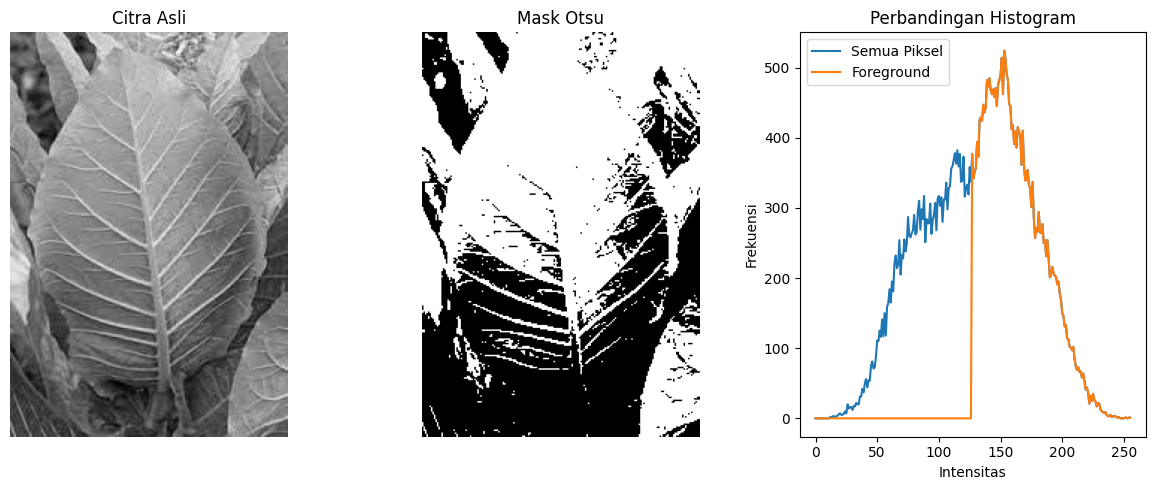

✅ Histogram foreground tobacco.jpg berhasil ditampilkan!


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ===== Soal 5: Histogram Foreground Image =====
filename = '/content/drive/MyDrive/Pcvk/tobacco.jpg'  # Path gambar
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("❌ Error: Gambar tobacco.jpg tidak ditemukan di path:", filename)
else:
    # Segmentasi dengan Otsu
    _, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    mask_fg = (mask == 255).astype(np.uint8)

    # Hitung histogram keseluruhan & foreground
    hist_all = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist_fg = cv2.calcHist([img], [0], mask_fg, [256], [0, 256])

    # ===== Tampilkan =====
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1); plt.imshow(img, cmap='gray'); plt.title('Citra Asli'); plt.axis('off')
    plt.subplot(1, 3, 2); plt.imshow(mask, cmap='gray'); plt.title('Mask Otsu'); plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.plot(hist_all, label='Semua Piksel')
    plt.plot(hist_fg, label='Foreground')
    plt.title('Perbandingan Histogram')
    plt.xlabel('Intensitas'); plt.ylabel('Frekuensi'); plt.legend()
    plt.tight_layout(); plt.show()

    print("✅ Histogram foreground tobacco.jpg berhasil ditampilkan!")


## Segmentasi Warna Kuning dengan K-Means

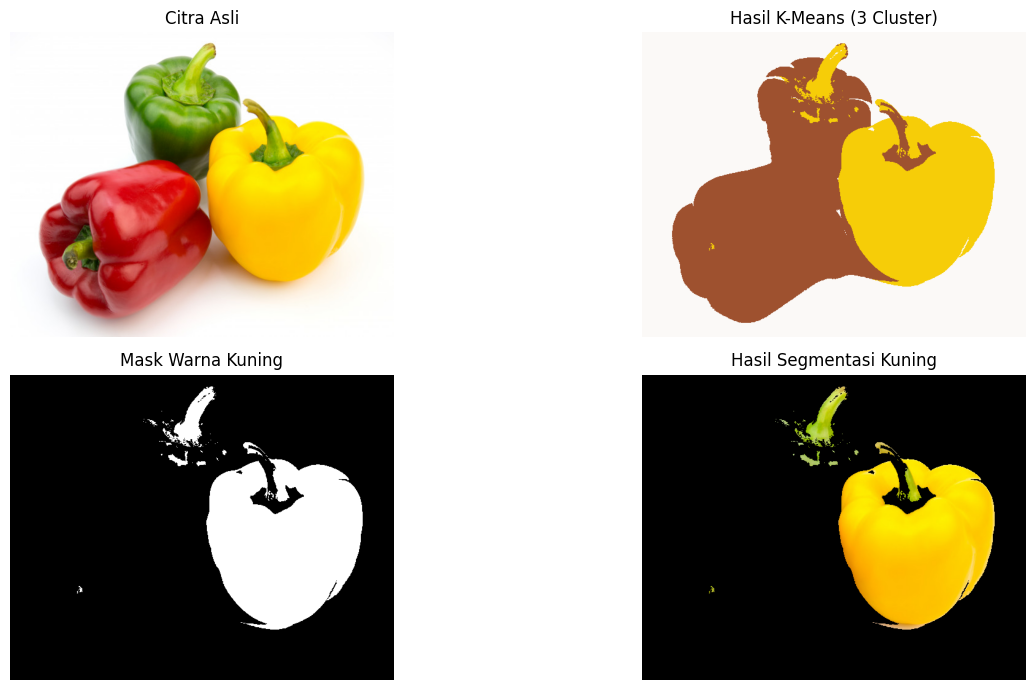

🎨 Pusat Cluster (RGB):
Cluster 0: R=158, G=81, B=47
Cluster 1: R=251, G=249, B=247
Cluster 2: R=246, G=205, B=8

🟡 Cluster terdeteksi sebagai kuning: [2]


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ===== Soal 6: Segmentasi Warna Kuning dengan K-Means =====
filename = '/content/drive/MyDrive/Pcvk/peppers.jpg'  # Path gambar
img = cv2.imread(filename)

if img is None:
    print("❌ Error: Gambar peppers.jpg tidak ditemukan di path:", filename)
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels = np.float32(img_rgb.reshape((-1, 3)))

    # K-Means clustering
    k = 3
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    segmented = centers[labels.flatten()].reshape(img_rgb.shape)

    # Deteksi cluster kuning (R & G tinggi, B rendah)
    yellow_clusters = [i for i, c in enumerate(centers) if c[0] > 150 and c[1] > 150 and c[2] < 150]
    mask = np.isin(labels.flatten(), yellow_clusters).astype(np.uint8).reshape(img_rgb.shape[:2])

    # Terapkan mask ke gambar asli
    yellow_only = img_rgb.copy()
    yellow_only[mask == 0] = [0, 0, 0]

    # ===== Tampilkan hasil =====
    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1); plt.imshow(img_rgb); plt.title('Citra Asli'); plt.axis('off')
    plt.subplot(2, 2, 2); plt.imshow(segmented); plt.title('Hasil K-Means (3 Cluster)'); plt.axis('off')
    plt.subplot(2, 2, 3); plt.imshow(mask, cmap='gray'); plt.title('Mask Warna Kuning'); plt.axis('off')
    plt.subplot(2, 2, 4); plt.imshow(yellow_only); plt.title('Hasil Segmentasi Kuning'); plt.axis('off')
    plt.tight_layout(); plt.show()

    print("🎨 Pusat Cluster (RGB):")
    for i, c in enumerate(centers):
        print(f"Cluster {i}: R={c[0]}, G={c[1]}, B={c[2]}")
    print(f"\n🟡 Cluster terdeteksi sebagai kuning: {yellow_clusters}")


## Kendala utama dalam menampilkan warna kuning dengan K-Means adalah hasil segmentasi kurang akurat akibat pencahayaan tidak merata, warna kuning yang bercampur, dan ruang warna RGB yang kurang efektif membedakan kuning dari warna serupa seperti oranye. Solusinya, gunakan ruang warna HSV untuk deteksi yang lebih stabil.

## Thresholding Biner Terbaik untuk crossword.jpg

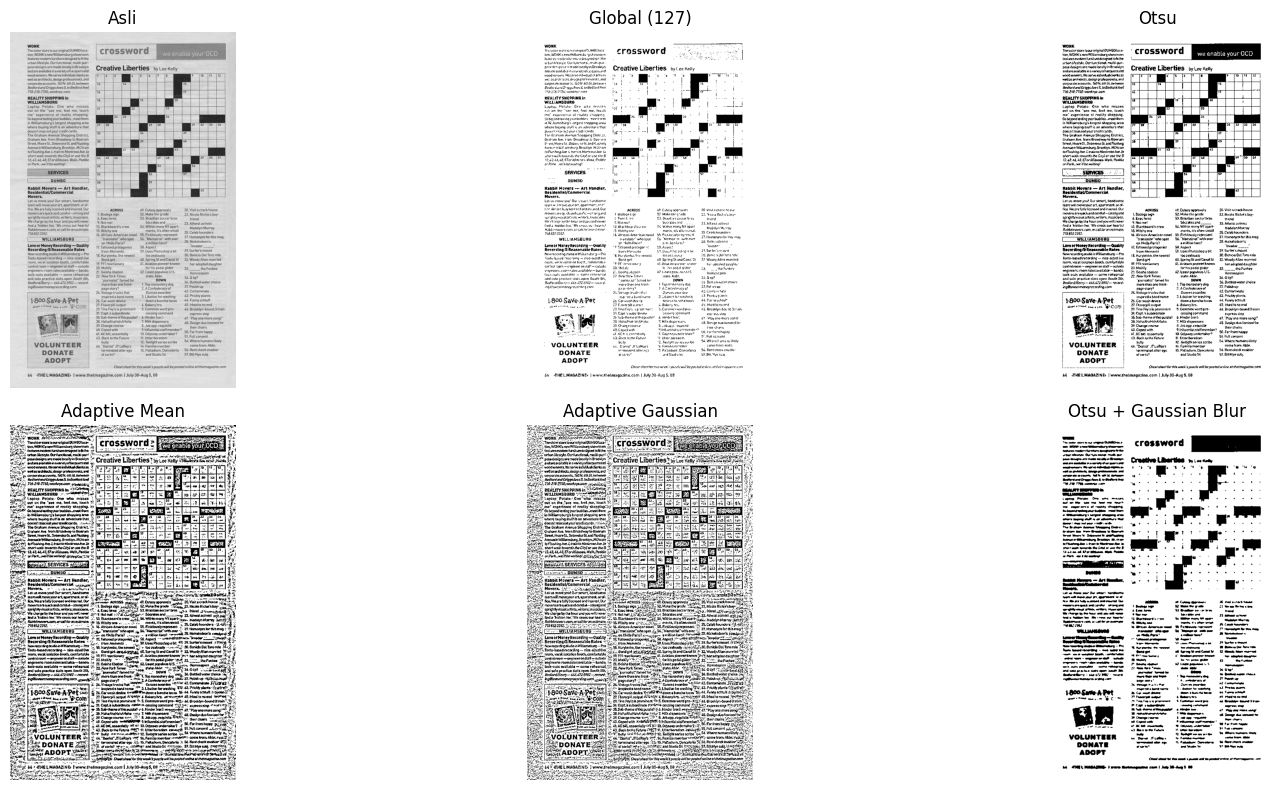

=== Rekomendasi Thresholding Terbaik ===
1️⃣ Adaptive Gaussian Threshold — hasil paling bersih & konsisten
2️⃣ Otsu + Gaussian Blur — efektif untuk mengurangi noise


In [22]:
import cv2
import matplotlib.pyplot as plt

# ===== Soal 7: Thresholding Biner Terbaik =====
filename = '/content/drive/MyDrive/Pcvk/crossword.jpg'  # Path gambar
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("❌ Error: Gambar crossword.jpg tidak ditemukan di path:", filename)
else:
    # Beberapa metode thresholding
    _, global_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    _, otsu_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    mean_bin = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, 11, 2)
    gauss_bin = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    _, otsu_blur = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Tampilkan hasil
    titles = ['Asli', 'Global (127)', 'Otsu', 'Adaptive Mean',
              'Adaptive Gaussian', 'Otsu + Gaussian Blur']
    images = [img, global_bin, otsu_bin, mean_bin, gauss_bin, otsu_blur]

    plt.figure(figsize=(18, 8))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Rekomendasi hasil terbaik
    print("=== Rekomendasi Thresholding Terbaik ===")
    print("1️⃣ Adaptive Gaussian Threshold — hasil paling bersih & konsisten")
    print("2️⃣ Otsu + Gaussian Blur — efektif untuk mengurangi noise")
